### 6 Qubits Grover Algorithm
### Dr.Ashraf Abozied
### 1 st Version
### 16-04-2020

In [1]:
# import qiskit Library
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute,IBMQ
# import basic plot tools
from qiskit.visualization import plot_histogram
# import Math Lib
import math
pi = math.pi
#Load your IBM Quantum Account
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')


In [18]:
TargetKey = '011100'
NoQbits=len(TargetKey)
if (NoQbits < 2):
        raise ValueError ( 'The Number of Qubits must be greater than 2' )
q = QuantumRegister(len(TargetKey)+1,'q')
c = ClassicalRegister(len(TargetKey),'c')
qc = QuantumCircuit(q,c)
qc.h(range(len(TargetKey)))
qc.x(len(TargetKey))
qc.h(len(TargetKey))
########################################
for ii , yesno in enumerate(reversed(TargetKey)):
    if yesno == '1' :
            qc.cx(ii, len(TargetKey))
########################################
qc.h(range(len(TargetKey)))

#### Some useful quantum circutes

In [19]:
#def cz(circuit, c1,target, u=pi):
    #circuit.cu1(u / 2, c1, target)
def c3x(circuit, c1, c2, c3, target, u=pi):
    circuit.h(target)
    c3z(circuit, c1, c2, c3, target, u)
    circuit.h(target)
def c4x(circuit, c1, c2, c3, c4, target, u=pi):
    circuit.h(target)
    c4z(circuit, c1, c2, c3, c4, target, u)
    circuit.h(target)
def c5x(circuit, c1, c2, c3, c4, c5, target, u=pi):
    circuit.h(target)
    c5z(circuit, c1, c2, c3, c4, c5, target, u)
    circuit.h(target)
def c2z(circuit, c1, c2, target, u=pi):
    circuit.cu1(u / 2, c1, target)
    circuit.cx(c1, c2)
    circuit.cu1(-u / 2, c2, target)
    circuit.cx(c1, c2)
    circuit.cu1(u / 2, c1, target)
def c3z(circuit, c1, c2, c3, target, u=pi):
    circuit.cu1(u / 4, c1, target)
    circuit.cx(c1, c2)
    circuit.cu1(-u / 4, c2, target)
    circuit.cx(c1, c2)
    circuit.cu1(u / 4, c2, target)
    circuit.cx(c2, c3)
    circuit.cu1(-u / 4, c3, target)
    circuit.cx(c1, c3)
    circuit.cu1(u / 4, c3, target)
    circuit.cx(c2, c3)
    circuit.cu1(-u / 4, c3, target)
    circuit.cx(c1, c3)
    circuit.cu1(u / 4, c3, target)   
def c4z(circuit, c1, c2, c3, c4, target, u=pi):
    circuit.cu1(u / 2, c4, target)
    c3x(circuit, c1, c2, c3, c4)
    circuit.cu1(-u / 2, c4, target)
    c3x(circuit, c1, c2, c3, c4)
    c3z(circuit, c1, c2, c3, target, u / 2)
def c5z(circuit, c1, c2, c3, c4, c5, target, u=pi):
    circuit.cu1(u / 2, c5, target)
    c4x(circuit, c1, c2, c3, c4, c5)
    circuit.cu1(-u / 2, c5, target)
    c4x(circuit, c1, c2, c3, c4, c5)
    c4z(circuit, c1, c2, c3, c4, target, u / 2)

In [20]:
def n_rotate_z(circuit, fin, u=pi):
    n = len(fin)-2
    if n == 1:
        circuit.cu1(u/2, fin[0], fin[n])
    elif n == 2:
        c2z(circuit, fin[0], fin[1], fin[n], u)
    elif n == 3:
        c3z(circuit, fin[0], fin[1], fin[2], fin[n], u)
    elif n == 4:
        c4z(circuit, fin[0], fin[1], fin[2], fin[3], fin[n], u)
    elif n == 5:
        c5z(circuit, fin[0], fin[1], fin[2], fin[3],fin[4], fin[n], u)


In [21]:
#### Amplification ####
print('\nPreparing Amplification circuit....\n')
def  inversionaboutaverage (circuit , fin , n ) :
#"""Apply inversion about the average step of Grover ' s al gorithm . """
    # Hadamards everywhere
    for j in range (n ) :
        circuit.h(fin[j])
    # D matrix : flips the sign of the state j00. . .00 > only
    for j in range (n ) :
        circuit.x(fin[j])
  
    #ncontrolledZ   
    if (NoQbits > 6):
        raise ValueError ( 'The controlledZ with more than 6 ' +' controls is not implemented' )
    if (NoQbits==2):
        n_rotate_z(circuit,fin, u=pi)
    elif (NoQbits==3):   
        n_rotate_z(circuit,fin, u=pi)
    elif (NoQbits==4):
        n_rotate_z(circuit,fin, u=pi)
    elif (NoQbits==5):
        n_rotate_z(circuit,fin, u=pi)
    elif (NoQbits==6):
        n_rotate_z(circuit,fin, u=pi)
    #ncontrolledZ      
    for j in range (n ) :
        circuit.x(fin[j])
    # Hadamards everywhere again
    for j in range (n) :
        circuit.h(fin[ j ])


Preparing Amplification circuit....



#### Inversion about the Average

In [22]:
inversionaboutaverage ( qc , q ,len(TargetKey))

#### Measure & Draw the circuit

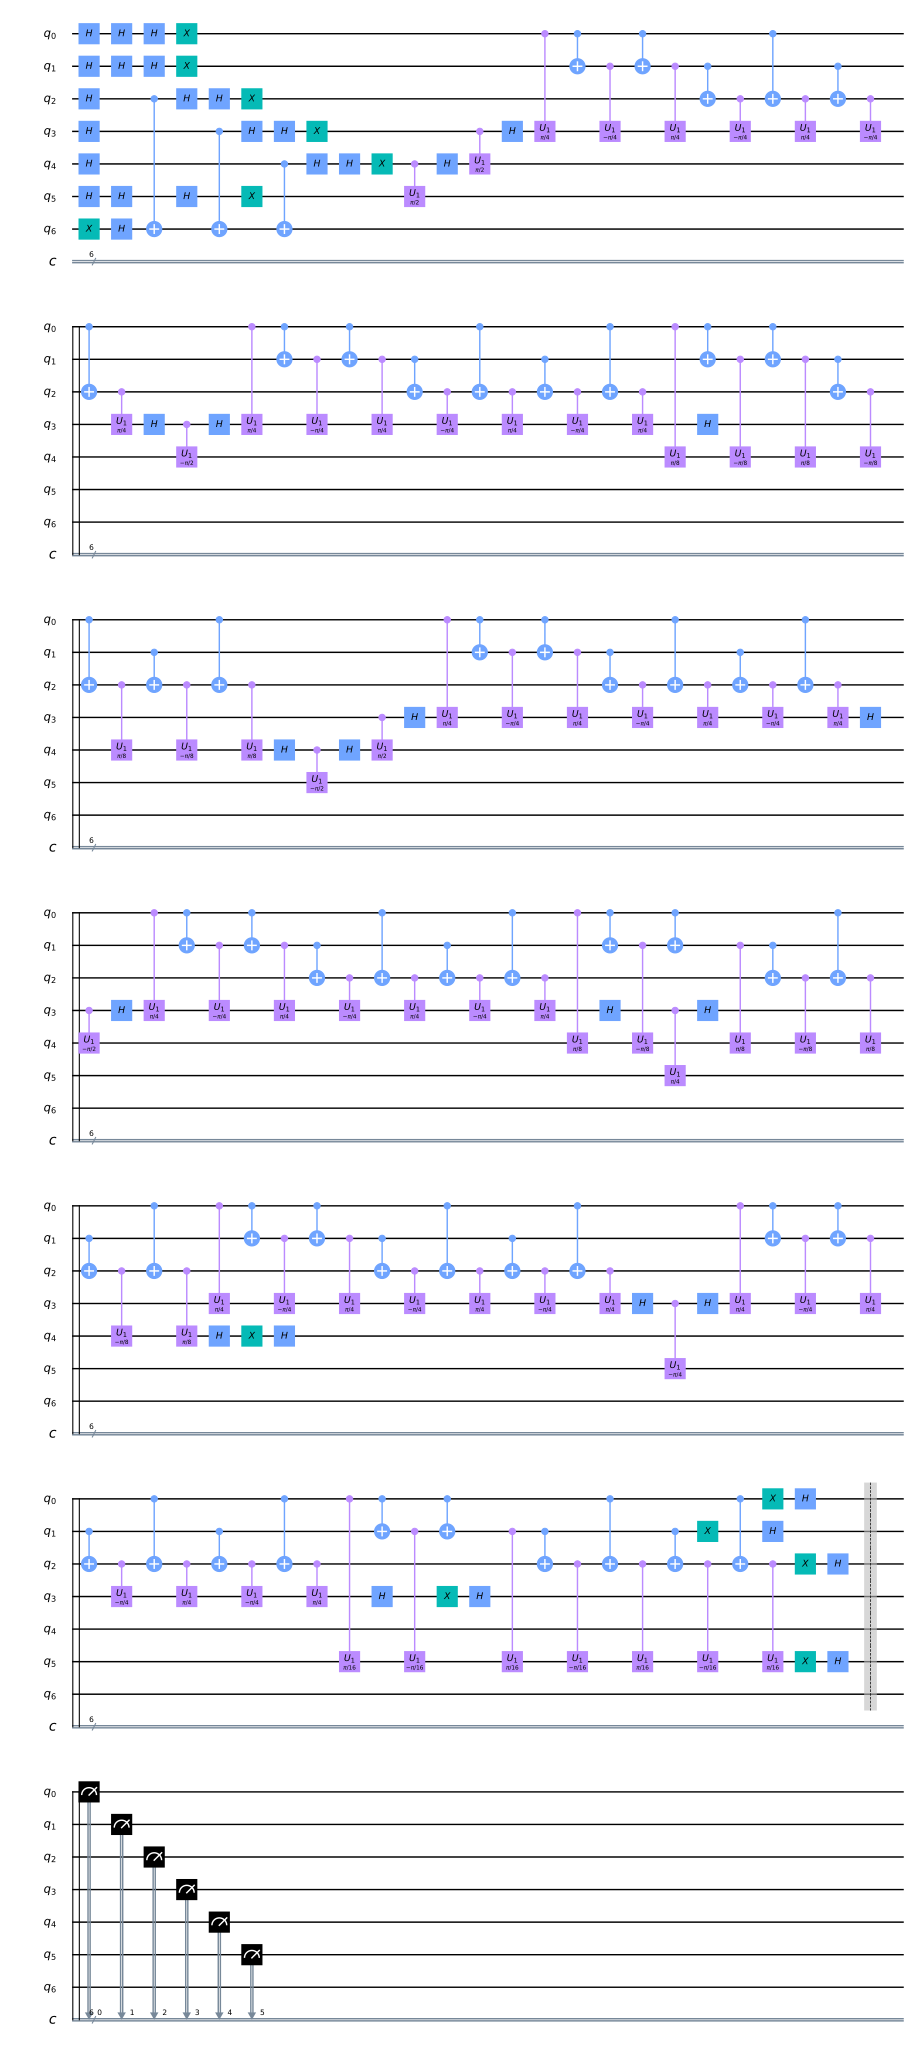

In [23]:
#Barrier
qc.barrier()
### Measurment ###
qc.measure(range(len(TargetKey)),range(len(TargetKey)))
qc.draw(output='mpl')

#### Executing the Algorithm and getting the results

In [24]:
backend = provider.get_backend('ibmq_qasm_simulator')
print('\nExecuting job....\n')
job = execute(qc, backend, shots=100)

result = job.result()
counts = result.get_counts(qc)

print('RESULT: ',counts,'\n')
#print('Press any key to close')
#input()


Executing job....

RESULT:  {'111101': 1, '100000': 1, '011100': 96, '100101': 1, '010100': 1} 



#### Draw the Results

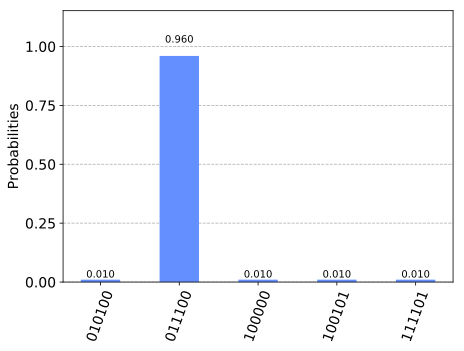

In [25]:
%config InlineBackend.figure_format = 'svg' # Image formatting again
plot_histogram(counts)